# Stock Price Prediction using Machine Learning    Techniques

# RollNo:215229109
Name:Daya Anandhi.J
    

# 1) Explore the Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#exploring the dataset
data = pd.read_csv('MSFT.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [3]:
#properties
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


In [6]:
#Showing Basics Statistics
data.describe().style.background_gradient(cmap = 'copper')

,Open,High,Low,Close,Adj Close,Volume
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000
mean,41.324936,41.760887,40.878488,41.335628,36.256120,58750553.836838
std,59.696905,60.272218,59.081728,59.714567,59.981436,38451997.550742
min,0.088542,0.092014,0.088542,0.090278,0.057046,2304000.000000
25%,4.050781,4.102051,4.027344,4.075195,2.575089,34612300.000000
50%,26.820000,27.100000,26.520000,26.840000,18.948530,52032000.000000
75%,40.034999,40.443751,39.500000,39.937500,29.244812,72654000.000000
max,344.619995,349.670013,342.200012,343.109985,342.402008,1031788800.000000


In [7]:
data.shape

(9083, 7)

In [8]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
#to check missing values 
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# 2) Data preprocessing

In [10]:
#categorical column
def date_column_preprocessing():
    
    # changing Date column dtype 
    data["Date"] = pd.to_datetime(data["Date"])
    
    # years column creating
    data["Year"] = pd.DatetimeIndex(data["Date"]).year
    
    # month column creating
    data["Month"] = data["Date"].dt.month_name()

date_column_preprocessing()

In [11]:
# new prepared dataset creating
main_data = data[["Open", "Close", "Adj Close", "High", "Low", "Volume", "Date", "Year", "Month"]]

main_data

,Open,Close,Adj Close,High,Low,Volume,Date,Year,Month
0,0.088542,0.097222,0.061434,0.101563,0.088542,1031788800,1986-03-13,1986,March
1,0.097222,0.100694,0.063628,0.102431,0.097222,308160000,1986-03-14,1986,March
2,0.100694,0.102431,0.064725,0.103299,0.100694,133171200,1986-03-17,1986,March
3,0.102431,0.099826,0.063079,0.103299,0.098958,67766400,1986-03-18,1986,March
4,0.099826,0.098090,0.061982,0.100694,0.097222,47894400,1986-03-19,1986,March
...,...,...,...,...,...,...,...,...,...
9078,295.369995,300.429993,300.429993,301.000000,292.730011,43317000,2022-03-18,2022,March
9079,298.890015,299.160004,299.160004,300.140015,294.899994,28351200,2022-03-21,2022,March
9080,299.799988,304.059998,304.059998,305.000000,298.769989,27599700,2022-03-22,2022,March
9081,300.510010,299.489990,299.489990,303.230011,297.720001,25715400,2022-03-23,2022,March


In [12]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       9083 non-null   float64       
 1   Close      9083 non-null   float64       
 2   Adj Close  9083 non-null   float64       
 3   High       9083 non-null   float64       
 4   Low        9083 non-null   float64       
 5   Volume     9083 non-null   int64         
 6   Date       9083 non-null   datetime64[ns]
 7   Year       9083 non-null   int64         
 8   Month      9083 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 638.8+ KB


# 3) Analyzing

In [13]:
# time series
dates = main_data["Date"]
years = main_data["Year"]
months = main_data["Month"]

# numeric info
low = main_data["Low"]
high = main_data["High"]
volume = main_data["Volume"]
adj_close = main_data["Adj Close"]
close = main_data["Close"]
open = main_data["Open"]

4.1) Review visualization.

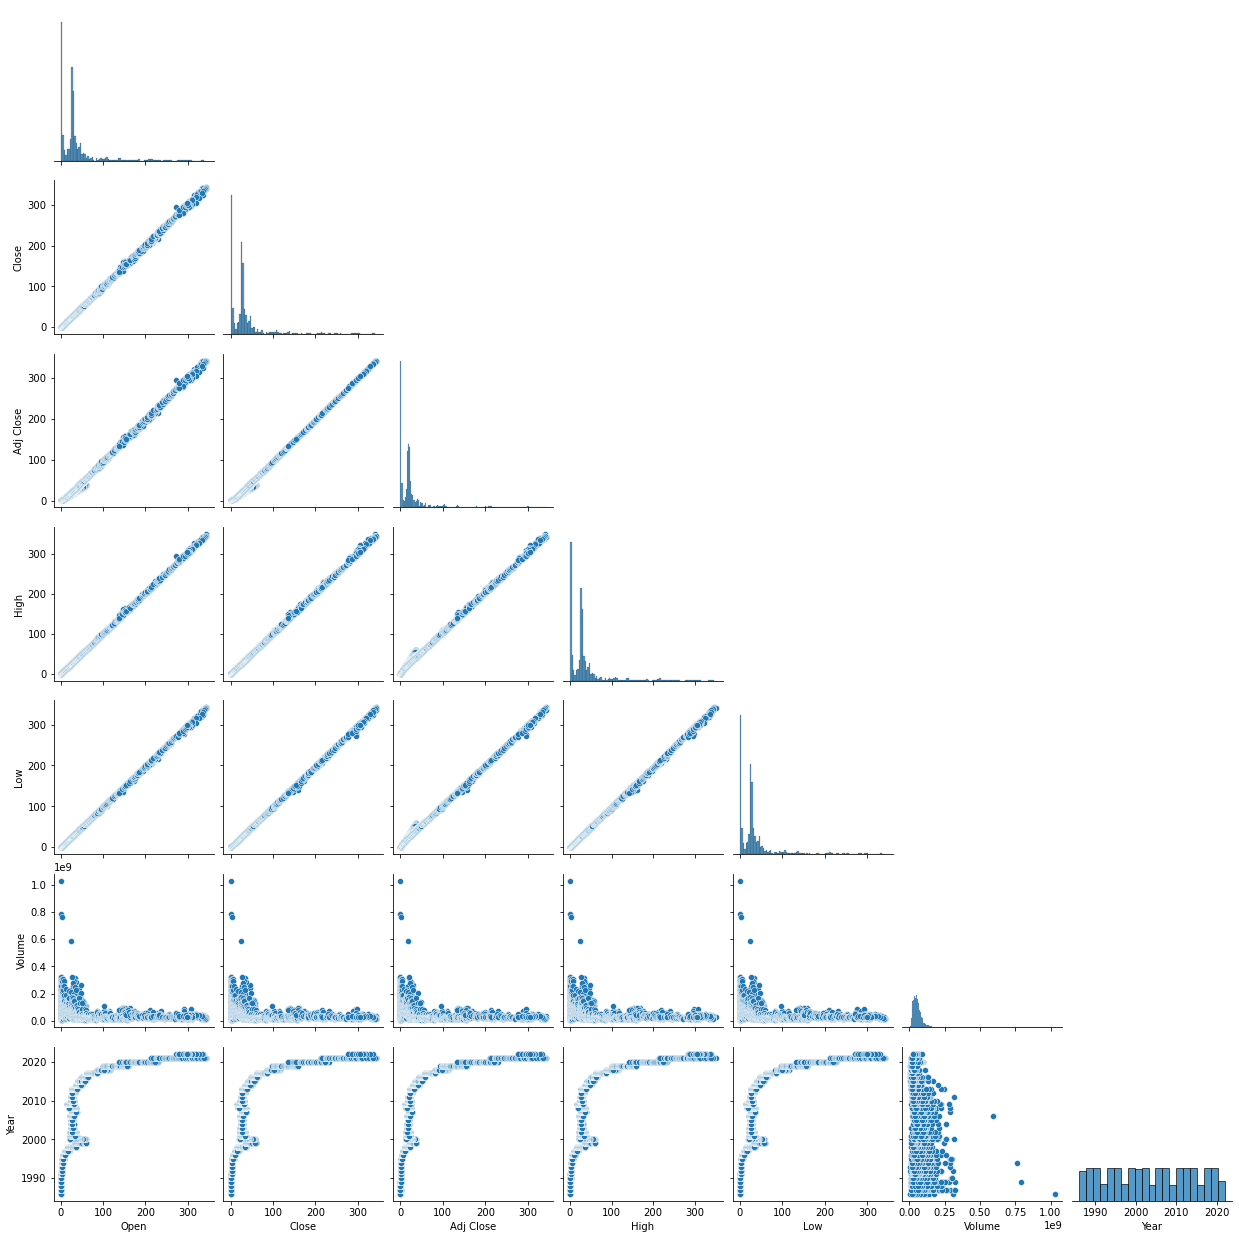

In [14]:
sns.pairplot(data = main_data, corner = True, kind = "scatter", diag_kind = "hist")

4.2) Time Series data analysis

In [20]:
#1998 - 2001 & 2015 - 2021 years period analysis
df_98_01 = main_data[main_data["Year"] >= 1998][main_data["Year"] <= 2001]

dates_98_01 = df_98_01["Date"]

open_98_01 = df_98_01["Open"]
close_98_01 = df_98_01["Close"]
adj_close_98_01 = df_98_01["Adj Close"]
min_98_01 = df_98_01["Low"]
max_98_01 = df_98_01["High"]

df_98_01

<ipython-input-20-5baf5326b1f6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_98_01 = main_data[main_data["Year"] >= 1998][main_data["Year"] <= 2001]


,Open,Close,Adj Close,High,Low,Volume,Date,Year,Month
2986,16.203125,16.390625,10.357126,16.437500,16.187500,39748000,1998-01-02,1998,January
2987,16.406250,16.296875,10.297886,16.703125,15.984375,80377600,1998-01-05,1998,January
2988,16.218750,16.390625,10.357126,16.625000,16.156250,67834400,1998-01-06,1998,January
2989,16.234375,16.195313,10.233708,16.398438,15.937500,61492800,1998-01-07,1998,January
2990,16.078125,16.312500,10.307762,16.515625,15.937500,77619200,1998-01-08,1998,January
...,...,...,...,...,...,...,...,...,...
3985,33.860001,33.634998,21.253735,34.014999,33.599998,11701600,2001-12-24,2001,December
3986,33.709999,33.840000,21.383268,34.535000,33.695000,29328000,2001-12-26,2001,December
3987,33.990002,33.924999,21.436975,34.355000,33.630001,32406600,2001-12-27,2001,December
3988,34.115002,33.935001,21.443295,34.424999,33.849998,28787200,2001-12-28,2001,December


In [21]:
df_15_21 = main_data[main_data["Year"] >= 2015][main_data["Year"] <= 2021]

dates_15_21 = df_15_21["Date"]

open_15_21 = df_15_21["Open"]
close_15_21 = df_15_21["Close"]
adj_close_15_21 = df_15_21["Adj Close"]
min_15_21 = df_15_21["Low"]
max_15_21 = df_15_21["High"]

df_15_21

<ipython-input-21-e929667312a1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_15_21 = main_data[main_data["Year"] >= 2015][main_data["Year"] <= 2021]


,Open,Close,Adj Close,High,Low,Volume,Date,Year,Month
7263,46.660000,46.759998,41.108837,47.419998,46.540001,27913900,2015-01-02,2015,January
7264,46.369999,46.330002,40.730808,46.730000,46.250000,39673900,2015-01-05,2015,January
7265,46.380001,45.650002,40.132988,46.750000,45.540001,36447900,2015-01-06,2015,January
7266,45.980000,46.230000,40.642883,46.459999,45.490002,29114100,2015-01-07,2015,January
7267,46.750000,47.590000,41.838531,47.750000,46.720001,29645200,2015-01-08,2015,January
...,...,...,...,...,...,...,...,...,...
9021,335.459991,342.450012,341.743378,342.480011,335.429993,19947000,2021-12-27,2021,December
9022,343.149994,341.250000,340.545837,343.809998,340.320007,15661500,2021-12-28,2021,December
9023,341.299988,341.950012,341.244415,344.299988,339.679993,15042000,2021-12-29,2021,December
9024,341.910004,339.320007,338.619843,343.130005,338.820007,15994500,2021-12-30,2021,December


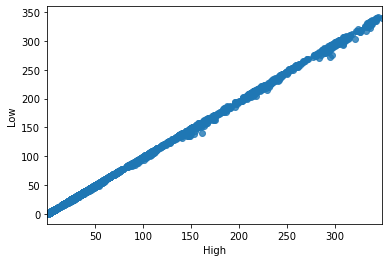

In [23]:
ax=sns.regplot(x='High',y='Low',data=data)

27.500000     17
0.381944      15
26.000000     15
0.364583      15
0.369792      15
              ..
105.309998     1
74.419998      1
2.416667       1
95.410004      1
206.350006     1
Name: High, Length: 5163, dtype: int64


<AxesSubplot:>

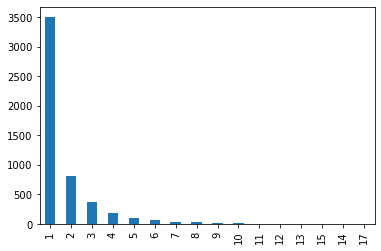

In [24]:
p = data['High'].value_counts()
print(p)
p.value_counts().plot.bar()

25.500000     18
0.378472      17
2.656250      17
27.000000     17
0.359375      16
              ..
16.257813      1
284.049988     1
73.879997      1
41.840000      1
43.812500      1
Name: Low, Length: 5183, dtype: int64


<AxesSubplot:>

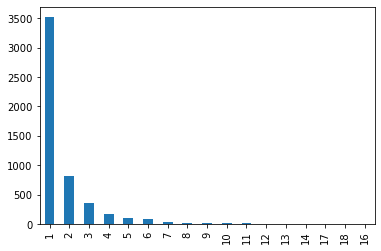

In [25]:
p = data['Low'].value_counts()
print(p)
p.value_counts().plot.bar()


In [27]:
print('Max is:',data.max())
print('Sum is:',data.sum())
print('Mean is:',data.mean())

Max is: Date         2022-03-24 00:00:00
Open                  344.619995
High                  349.670013
Low                   342.200012
Close                 343.109985
Adj Close             342.402008
Volume                1031788800
Year                        2022
Month                  September
dtype: object
Sum is: Open                                             375354.394619
High                                             379314.135717
Low                                              371299.310375
Close                                            375451.505415
Adj Close                                        329314.342455
Volume                                            533631280500
Year                                                  18199552
Month        MarchMarchMarchMarchMarchMarchMarchMarchMarchM...
dtype: object
Mean is: Open         4.132494e+01
High         4.176089e+01
Low          4.087849e+01
Close        4.133563e+01
Adj Close    3.625612e+01
Volume       5.8

<ipython-input-27-51c84d4d5f24>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print('Mean is:',data.mean())


18316800     4
47577600     3
95788800     3
48729600     3
3427200      3
            ..
112622400    1
27669900     1
81590400     1
17139300     1
49864700     1
Name: Volume, Length: 8901, dtype: int64


<AxesSubplot:>

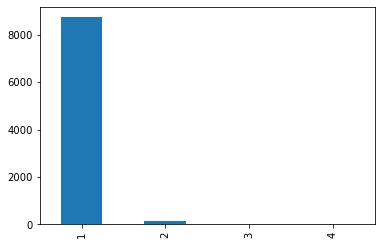

In [28]:
p = data['Volume'].value_counts()
print(p)
p.value_counts().plot.bar()

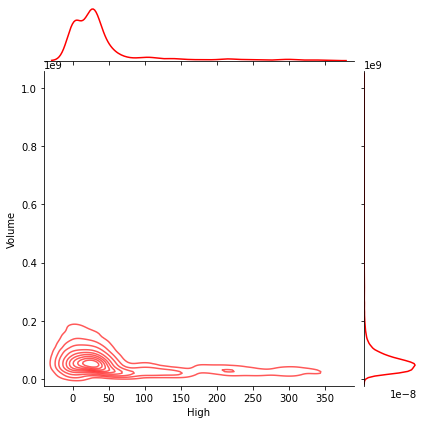

In [29]:
sns.jointplot(x = 'High', y = 'Volume',
              data = data, kind = 'kde', color = "red", alpha = 0.65)

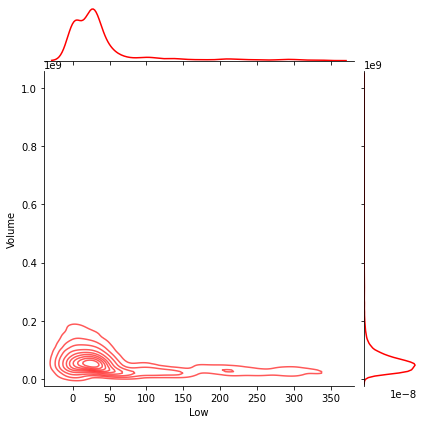

In [30]:
sns.jointplot(x = 'Low', y = 'Volume',
              data = data, kind = 'kde', color = "red", alpha = 0.65)

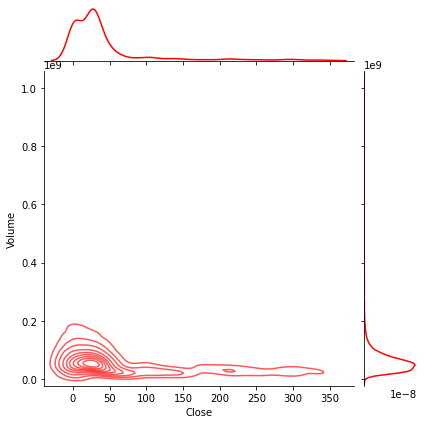

In [31]:
sns.jointplot(x = 'Close', y = 'Volume',
              data = data, kind = 'kde', color = "red", alpha = 0.65)

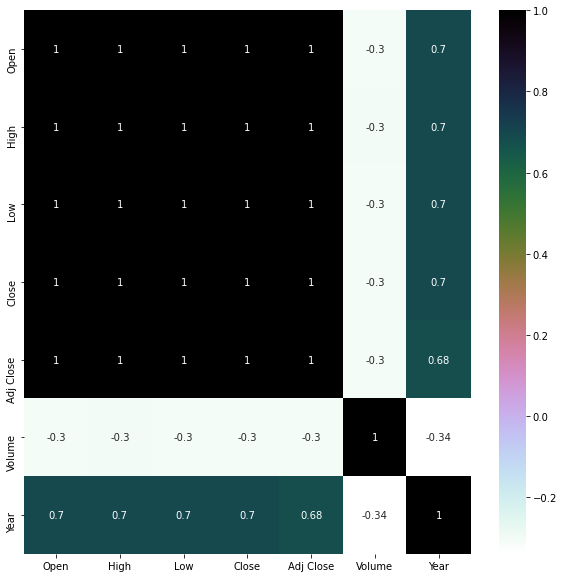

In [33]:
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.figure(figsize=(10,10)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

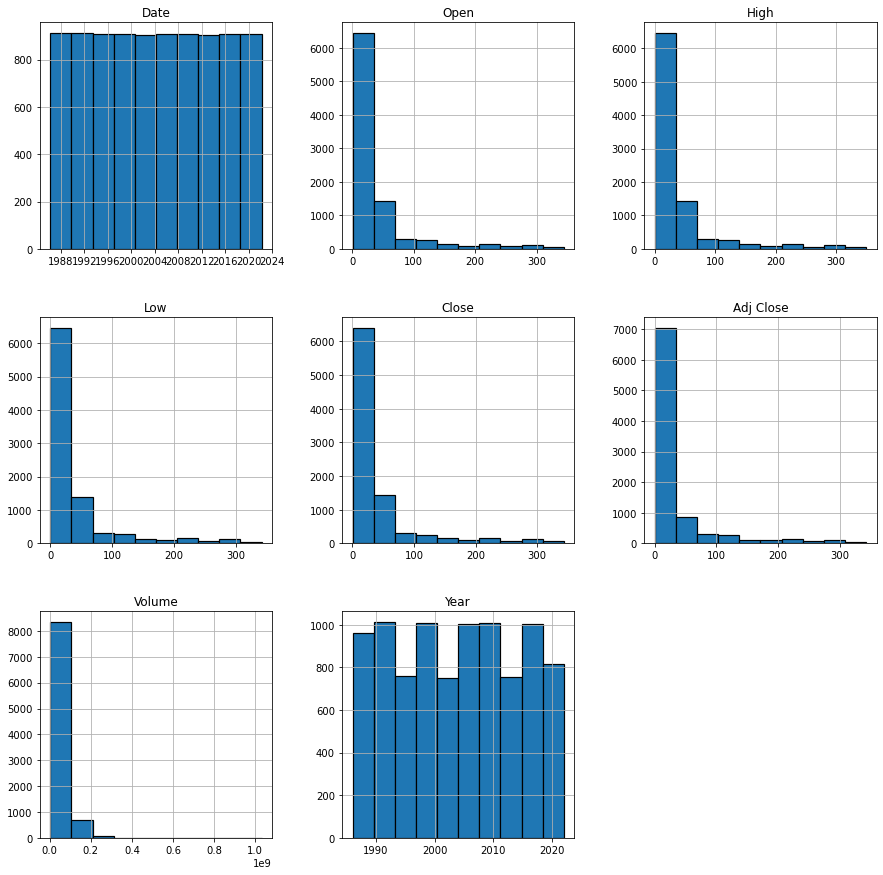

In [34]:
data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [9]:
data.drop(['Date'],axis=1,inplace=True)

In [11]:
#spliting
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions1 = lr.predict(X_test)
print(list(predictions1))

[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [16]:
print(classification_report(y_test,predictions1))
print('\n')
print(confusion_matrix(y_test,predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



[[15  0]
 [ 0 10]]


In [17]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
clss = LogisticRegression(random_state = 0)
clss.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
# Predicting the Test set results
y_pred = clss.predict(X_test)
print(list(y_pred ))

[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [19]:
#probability of all values
pr = clss.predict_proba(X_test)[0:10,:]
pr

array([[8.43664348e-01, 1.56335652e-01],
       [1.19065922e-03, 9.98809341e-01],
       [2.13781577e-02, 9.78621842e-01],
       [3.38249203e-02, 9.66175080e-01],
       [9.99946888e-01, 5.31121030e-05],
       [2.36352523e-02, 9.76364748e-01],
       [9.77335071e-01, 2.26649288e-02],
       [3.62880927e-01, 6.37119073e-01],
       [7.08963650e-02, 9.29103635e-01],
       [5.00186393e-01, 4.99813607e-01]])

In [20]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[15,  0],
       [ 0, 10]], dtype=int64)

<AxesSubplot:>

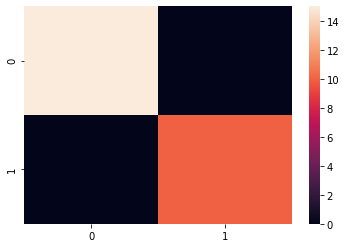

In [21]:
sns.heatmap(cm)

In [22]:
#test accuracy
from sklearn.metrics import accuracy_score
acclr = accuracy_score(y_test,predictions1)*100
acclr

100.0